# Table of Contents
* [Simple plot](#Simple-plot)
* [Plot with errors](#Plot-with-errors)
	* [Error bars](#Error-bars)
	* [Error areas](#Error-areas)
* [Boxplot](#Boxplot)
* [Suplots](#Suplots)
* [Better looking plots](#Better-looking-plots)
* [Saving a figure](#Saving-a-figure)


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Simple plot

Make a simple of x versus y1 and x versus y2. To differentiate the two lines, we add a color and a pattern to the plots: `plt.plot(x,y1,'k--')`, which will create a black (`k`) dashed line (`--`). This method uses a short hand notation that supports a subset of colors and patterns. The supported patterns are:
* solid: `-`
* dashed: `--`
* dash-dot: `-.` (only in this order!)
* dotted: `:`

The supported colors are:
* black: `k`
* white: `w`
* red: `r`
* green: `g`
* blue: `b`
* yellow: `y`
* cyan: `c`
* mangenta: `m`

Besides colors and patters, we can also use markers to distinguish lines. These markers are added to the pattern; for example `k--*` will generate a black dashed line with stars as markers.

Because we have more than one line, we should add a legend: `plt.legend(loc=0)`. With the option `loc=0` we ast matplotlib to put the legend in the best possible location. More on legends [here](http://matplotlib.org/users/legend_guide.html)

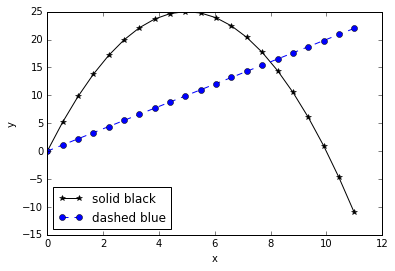

In [2]:
x = np.linspace(0,11,21)
y1 = -np.power(x-5,2)+25
y2 = 2*x
plt.plot(x,y1,'-k*',label='solid black')
plt.plot(x,y2,'--bo',label='dashed blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0)

# Plot with errors

## Error bars

To plot error bars we use the `errorbar` function. Note that we can not just put the patterns, discussed above, in the command. Instead, we add the pattern with the argument name: `fmt='k--o'`.

<Container object of 3 artists>

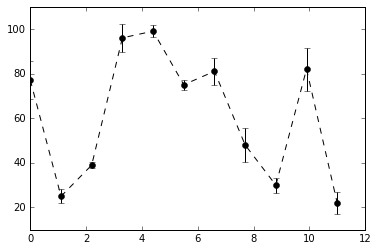

In [3]:
x = np.linspace(0,11,11)
y = np.random.randint(10,100,11)
yerr = 10*np.random.random(11)
plt.errorbar(x, y,yerr=yerr,fmt='k--o')

## Error areas

Instead of using error bars, you could also create 'error areas' (I don't know if there is an official name for this). To do this, we first plot the line with `plot` and then fill the area between `y-yerr` and `y+yerr` using the `fill_between` command. Note that we set the line width (`lw`) to zero to prevent matplotlib from drawing the outer boundary. The color and opacity are controlled with the `facecolor` and `alpha` attributes. The facecolor can be any of the colors [here](http://matplotlib.org/examples/color/named_colors.html) and the alpha value must be between 0 and 1.

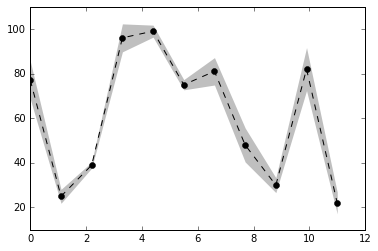

In [4]:
plt.plot(x, y,'k--o')
plt.fill_between(x,y-yerr,y+yerr,lw=0,facecolor='grey',alpha=0.5)

# Boxplot

Using the `boxplot` command we can make a simple boxplot. This commands takes a numpy array with N rows and M columns and generates M boxplots that each represent N data points. 

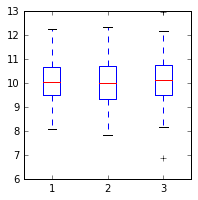

In [5]:
d1 = np.random.normal(10,1,(100,3))
d2 = np.random.normal(12,2,(100,3))
figure(figsize=(3,3))
plt.boxplot(d1);


The `boxplot` function has an optional argument `positions` that determines the positions of the boxes. This argument can also be utilized to put boxplots of multiple data sets in one plot. Note that after using the `positions` argument, you must fix the xticks (the markers on the x-axis) and set the x-limits (with `xlim`) by hand:

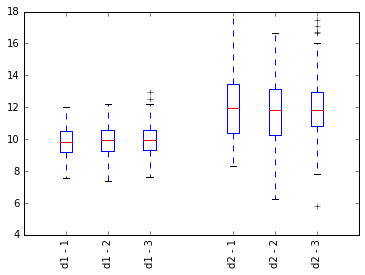

In [6]:
# dummy data
d1 = np.random.normal(10,1,(100,3))
d2 = np.random.normal(12,2,(100,3))

# plots
plt.boxplot(d1,positions=[1,2,3]);    
plt.boxplot(d2,positions=[5,6,7]);

# fix xticks (markers on the x-axis) and add labels
plt.xticks([1,2,3,5,6,7],
           ['d1 - 1','d1 - 2','d1 - 3','d2 - 1','d2 - 2','d2 - 3'],
           rotation='vertical')

# add some extra space to the left and right
plt.xlim([0,8]);


This could be done in a more flexible way, as shown below:

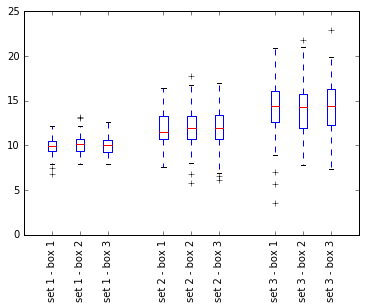

In [7]:
#----- Parameters for dummy data -----#
# number of datasets
n_set = 3
# number of boxes per dataset
n_box = 3
# number of points per box
n_pts = 100

# extra distance between each set of boxplots
dx = 1

# create empty list of x-markers
# this list will be filled automatically in the for-loop
xticks = []

# create emtpy list with labels to put at each x-marker
# this list will be filled automatically in the for-loop
labels = []

for i in range(n_set):
    # create dummy data
    d = np.random.normal(10+2*i,1+i,(n_pts,n_box))
    # generate list of positions for the boxplots
    pos = np.arange(1,n_box+1)+i*n_box+i*dx
    # add positions to the list of xticks
    xticks += list(pos)
    # add labels to the list of labels
    labels += ['set {} - box {}'.format(i+1,n) for n in range(1,n_box+1)]
    # create boxplots
    plt.boxplot(d,positions=pos);    
# fix xlmits
plt.xlim([0,n_box*n_set+n_set*dx]);
# set xticks
plt.xticks(xticks,labels,rotation='vertical');


# Suplots

The easiest way to make subplots in matplotlib with is using the `subplot` command:
```
plt.subplot(number_of_rows,number_of_columns,current_plot)
```

This command selects a certain subplot and all plotting commands that follow a subplot command with affect the selected plot. For example `plt.subplot(1,3,2)` will select the middle plot in a figure with 3 plots in one row.

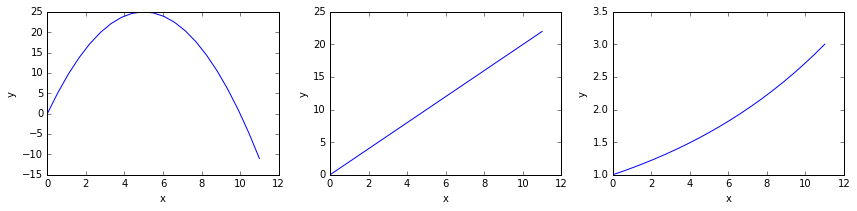

In [8]:
# make the figure bigger to fit all the plots
f = figure(figsize=(12,3))
x = np.linspace(0,11,21)
y1 = -np.power(x-5,2)+25
y2 = 2*x
y3 = np.exp(x/10.)

# subplot 1
subplot(1,3,1)
plt.plot(x,y1)
plt.xlabel('x')
plt.ylabel('y')

# subplot 2
subplot(1,3,2)
plt.plot(x,y2)
plt.xlabel('x')
plt.ylabel('y')

# subplot 3
subplot(1,3,3)
plt.plot(x,y3)
plt.xlabel('x')
plt.ylabel('y')

# make sure that everyting fits nicely
plt.tight_layout()

# Better looking plots

Matplotlib creates descent plots, but they are not beautiful. Furthermore, the default font size is pretty small and changing that is not so easy. A much easier way to change how the plots look is by using seaborn (which is included in Anaconda).

First, we import seaborn, and we set the context that controls the font sizes and line widths. I also increase the font size a bit to make it easier to read the axis. The following contexts are available:
* notebook
* paper
* talk
* poster

Finally, we make a function that generates a simple plot that we will use to showcase seaborn.

In [9]:
import seaborn as sns
sns.set_context("notebook",font_scale=1.25)

def make_plot():
    figure(figsize=(4,3))
    x = np.linspace(0,11,21)
    y1 = -np.power(x-5,2)+25
    y2 = 2*x
    plt.plot(x,y1,'-k*',label='solid black')
    plt.plot(x,y2,'--bo',label='dashed blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=0)

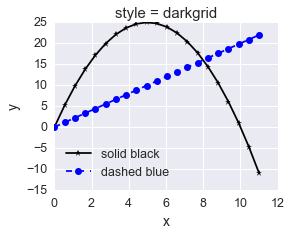

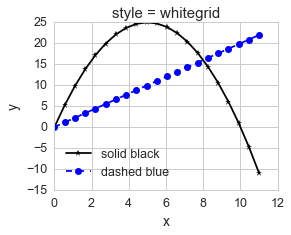

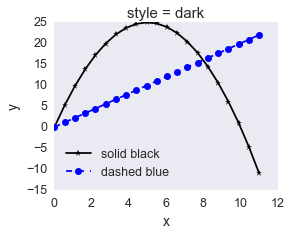

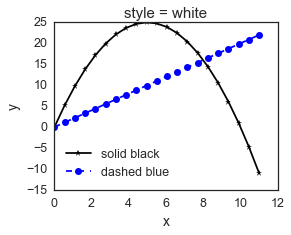

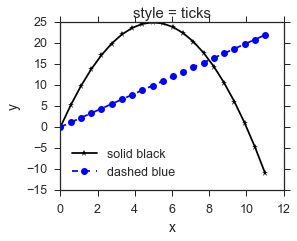

In [10]:
styles = ['darkgrid', 'whitegrid', 'dark', 'white','ticks']
for style in styles:
    sns.set_style(style)
    make_plot()
    plt.title('style = {}'.format(style))

To make the plots look, even, better we can remove the x-axis on the top and the y-axis on the right with the `despine` command.

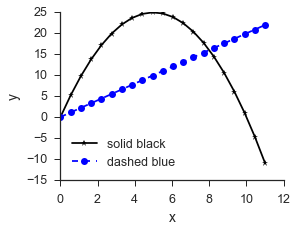

In [11]:
sns.set_style('ticks')
make_plot()
sns.despine()

# Saving a figure

A figure can be saved with the `savefig` command. This command saves the current figure to a specified filename:
```
plt.savefig('filename.extension')
```

The figure type is determined by the extension, which may be: png, pdf, ps, eps, or svg.

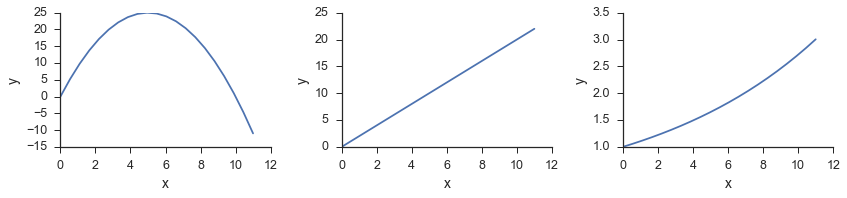

In [12]:
sns.set_style('ticks')

# make the figure bigger to fit all the plots
f = figure(figsize=(12,3))
x = np.linspace(0,11,21)
y1 = -np.power(x-5,2)+25
y2 = 2*x
y3 = np.exp(x/10.)

# subplot 1
subplot(1,3,1)
plt.plot(x,y1)
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

# subplot 2
subplot(1,3,2)
plt.plot(x,y2)
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

# subplot 3
subplot(1,3,3)
plt.plot(x,y3)
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

# make sure that everyting fits nicely
plt.tight_layout()

# save eps figure
plt.savefig('test.eps')
# save png figure
plt.savefig('test.png')